In [2]:
!pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
asttokens               2.4.1
astunparse              1.6.3
certifi                 2024.6.2
charset-normalizer      3.3.2
colorama                0.4.6
comm                    0.2.2
contourpy               1.2.1
cycler                  0.12.1
debugpy                 1.8.1
decorator               5.1.1
distutils-pytest        0.2.1
executing               2.0.1
fingerprint_enhancer    0.0.13
flatbuffers             24.3.25
fonttools               4.51.0
gast                    0.5.4
google-pasta            0.2.0
grpcio                  1.64.1
h5py                    3.11.0
idna                    3.7
imageio                 2.34.1
iniconfig               2.0.0
ipykernel               6.29.4
ipython                 8.22.2
jedi                    0.19.1
joblib                  1.3.2
jupyter_client          8.6.1
jupyter_core            5.7.2
keras                   3.3.3
kiwisolver          

In [3]:
import numpy as np
import glob
import random
import imageio.v2 as imageio
import pandas as pd
import matplotlib.pyplot as plt

import cv2

from PIL import Image , ImageFilter




In [4]:
import numpy as np
import os
import itertools
import numpy as np
#import seaborn as sns
"""from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, regularizers, optimizers, callbacks"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import glob
import random
import imageio
import PIL, cv2
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import skimage
from scipy.ndimage import convolve
from PIL import Image,ImageFilter
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
import math

In [5]:
DATA_DIR = 'C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\INPUT\\SOCOFing\\Real\\'
list_dirs = list(glob.glob(DATA_DIR + "*.BMP"))
num_images = len(list_dirs)


In [6]:
img_size = 96
vertical_prewitt_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
def load_data(path, train=True):
    print("Loading data from: ", path)
    data = []
    for img in os.listdir(path):
        imgname, ext = os.path.splitext(img)
        ID, etc = imgname.split('__')
        ID = int(ID) - 1
        if train:
            _, lr, finger, _, _ = etc.split('_')
        else:
            _, lr, finger, _  = etc.split('_')
        if lr=='Left':
            base = 0
        else: base  = 5
        if finger=="little":
            fingerNum = base + 0
        elif finger=='ring':
            fingerNum = base + 1
        elif finger=='middle':
            fingerNum = base + 2
        elif finger=='index':
            fingerNum = base + 3 
        else: fingerNum = base + 4
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        #gauss_blur = cv2.GaussianBlur(img_array,(1,1),0)
        #_,th1 = cv2.threshold(gauss_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        #convolved_img =  convolve(th1,vertical_prewitt_filter )
        #convolved_img =  convolve(convolved_img,horizontal_prewitt_filter )
        img_resize = cv2.resize(img_array, (img_size, img_size))
        data.append([ID, fingerNum, img_resize])
    return data

In [7]:
Altered_path = "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\INPUT\\SOCOFing\\Altered\\Altered-"
Real_path = "C:\\ONE_DRIVE_DATA\\Desktop\\GRIET\\AAC\\PROJECT\\INPUT\\SOCOFing\\Real"

Easy_data = load_data(Altered_path+'Easy', train=True)
Medium_data = load_data(Altered_path+'Medium', train=True)
Hard_data = load_data(Altered_path+'Hard', train=True)
Real_data = load_data(Real_path, train=False)

#Altered_data = np.concatenate([Easy_data, Medium_data, Hard_data], axis=0)
Altered_data = Easy_data + Hard_data + Medium_data
del Easy_data, Medium_data, Hard_data

Loading data from:  C:\ONE_DRIVE_DATA\Desktop\GRIET\AAC\PROJECT\INPUT\SOCOFing\Altered\Altered-Easy
Loading data from:  C:\ONE_DRIVE_DATA\Desktop\GRIET\AAC\PROJECT\INPUT\SOCOFing\Altered\Altered-Medium
Loading data from:  C:\ONE_DRIVE_DATA\Desktop\GRIET\AAC\PROJECT\INPUT\SOCOFing\Altered\Altered-Hard
Loading data from:  C:\ONE_DRIVE_DATA\Desktop\GRIET\AAC\PROJECT\INPUT\SOCOFing\Real


In [8]:
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
# from keras.preprocessing.image import ImageDataGenerator
from keras import layers, regularizers, optimizers, callbacks

In [9]:
X_Altered, y_SubjectID_Altered, y_fingerNum_Altered = [], [], []

for SubjectID, fingerNum, feature in Altered_data:
    X_Altered.append(feature)
    y_SubjectID_Altered.append(SubjectID)
    y_fingerNum_Altered.append(fingerNum)
print(y_SubjectID_Altered[0])
X_Altered = np.array(X_Altered).reshape(-1, img_size, img_size, 1)
X_Altered = X_Altered / 255.0
y_SubjectID_Altered = to_categorical(y_SubjectID_Altered, num_classes=600) 
y_fingerNum_Altered = to_categorical(y_fingerNum_Altered, num_classes=10)

X_SubjectID_train, X_SubjectID_val, y_SubjectID_train, y_SubjectID_val = train_test_split(
    X_Altered, y_SubjectID_Altered, test_size=0.2, random_state=2)
X_fingerNum_train, X_fingerNum_val, y_fingerNum_train, y_fingerNum_val = train_test_split(
    X_Altered, y_fingerNum_Altered, test_size=0.2, random_state=2)

99


In [10]:
X_test, y_SubjectID_test, y_fingerNum_test = [], [], []

for SubjectID, fingerNum, feature in Real_data:
    X_test.append(feature)
    y_SubjectID_test.append(SubjectID)
    y_fingerNum_test.append(fingerNum)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
X_test = X_test / 255.0

y_SubjectID_test = to_categorical(y_SubjectID_test, num_classes=600)
y_fingerNum_test = to_categorical(y_fingerNum_test, num_classes=10)

In [11]:
nets = 2
model = [0] * nets
final_Dense_units = [600, 10]
model_name = ['SubjectID_Mod', 'FingerNum_Mod']
for i in range(nets):
    model[i] = Sequential(name=model_name[i])

    model[i].add(layers.Conv2D(32, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (96, 96, 1)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Conv2D(64,(5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Dropout(0.3))
    model[i].add(layers.Flatten())
    model[i].add(layers.Dense(128, activation='relu'))
    model[i].add(layers.Dropout(0.4))
    model[i].add(layers.Dense(final_Dense_units[i], activation='softmax'))

    model[i].compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
    model[i].summary()

c:\Users\Aluri Surya Teja\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "SubjectID_Mod"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 92, 92, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 92, 92, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 42, 42, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 42, 42, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,612,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 600)            │        77,400 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,742,680 (14.28 MB)

 Trainable params: 3,742,488 (14.28 MB)

 Non-trainable params: 192 (768.00 B)

Model: "FingerNum_Mod"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 92, 92, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 92, 92, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 42, 42, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 42, 42, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,612,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,666,570 (13.99 MB)

 Trainable params: 3,666,378 (13.99 MB)

 Non-trainable params: 192 (768.00 B)

In [12]:
del X_fingerNum_train, X_fingerNum_val, y_fingerNum_train, y_fingerNum_val

In [13]:
history = [0] * nets
CallBack = [0] * nets
ReduceLR_minlr = [1e-9, 1e-7]
epochs = 20
batch_size = 64
for i in range(nets):
    CallBack[i] = [
        callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
        callbacks.ReduceLROnPlateau(factor=0.1, patience=1, min_lr=ReduceLR_minlr[i], verbose=1),
        callbacks.TensorBoard(log_dir="./log_dir/"+model_name[i])]
history[0] = model[0].fit(X_SubjectID_train, y_SubjectID_train,
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (X_SubjectID_val, y_SubjectID_val),
                    verbose = 1, callbacks= CallBack[0])


Epoch 1/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 198s 316ms/step - accuracy: 0.0020 - loss: 6.4704 - val_accuracy: 0.0027 - val_loss: 6.4187 - learning_rate: 1.0000e-04
Epoch 2/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 187s 304ms/step - accuracy: 0.0044 - loss: 6.3842 - val_accuracy: 0.0159 - val_loss: 6.1335 - learning_rate: 1.0000e-04
Epoch 3/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 189s 307ms/step - accuracy: 0.0201 - loss: 6.0044 - val_accuracy: 0.0851 - val_loss: 5.2996 - learning_rate: 1.0000e-04
Epoch 4/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 193s 313ms/step - accuracy: 0.0902 - loss: 5.0486 - val_accuracy: 0.4542 - val_loss: 3.5214 - learning_rate: 1.0000e-04
Epoch 5/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 194s 314ms/step - accuracy: 0.3236 - loss: 3.3116 - val_accuracy: 0.8593 - val_loss: 1.2765 - learning_rate: 1.0000e-04
Epoch 6/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 186s 302ms/step - accuracy: 0.6118 - loss: 1.7158 - val_accuracy: 0.9706 - val_loss: 0.4492 - learning_rate: 1.0000e-04
Epoch 7/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 

In [14]:
X_fingerNum_train, X_fingerNum_val, y_fingerNum_train, y_fingerNum_val = train_test_split(
    X_Altered, y_fingerNum_Altered, test_size=0.2, random_state=2)
history[1] = model[1].fit(X_fingerNum_train, y_fingerNum_train,
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (X_fingerNum_val, y_fingerNum_val),
                    verbose = 1, callbacks= CallBack[1])


Epoch 1/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 200s 319ms/step - accuracy: 0.3324 - loss: 1.9955 - val_accuracy: 0.6074 - val_loss: 1.1422 - learning_rate: 1.0000e-04
Epoch 2/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 190s 308ms/step - accuracy: 0.5926 - loss: 1.1643 - val_accuracy: 0.7570 - val_loss: 0.7389 - learning_rate: 1.0000e-04
Epoch 3/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 189s 306ms/step - accuracy: 0.7386 - loss: 0.7588 - val_accuracy: 0.9048 - val_loss: 0.3705 - learning_rate: 1.0000e-04
Epoch 4/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 189s 307ms/step - accuracy: 0.8399 - loss: 0.4883 - val_accuracy: 0.9640 - val_loss: 0.2064 - learning_rate: 1.0000e-04
Epoch 5/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 188s 305ms/step - accuracy: 0.8887 - loss: 0.3541 - val_accuracy: 0.9727 - val_loss: 0.1633 - learning_rate: 1.0000e-04
Epoch 6/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 189s 306ms/step - accuracy: 0.9202 - loss: 0.2720 - val_accuracy: 0.9803 - val_loss: 0.1194 - learning_rate: 1.0000e-04
Epoch 7/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 

Id recognition accuracy:  99.75000023841858 %


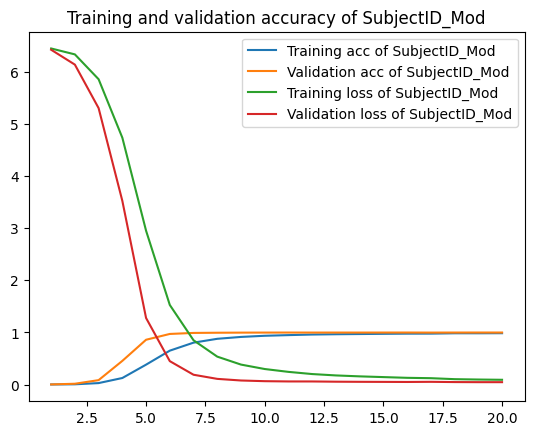

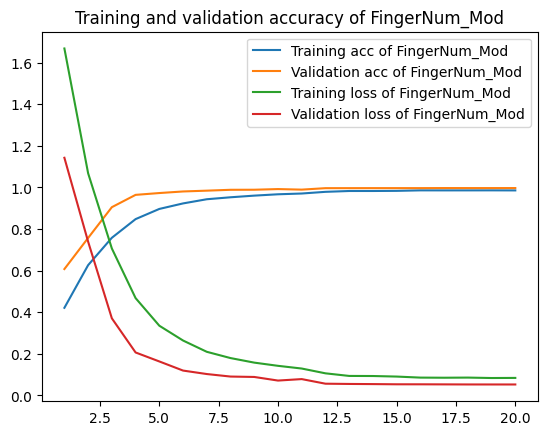

In [15]:
acc = [0] * nets
val_acc = [0] * nets
loss = [0] * nets
val_loss = [0] * nets
for i in range(nets):
    acc[i] = history[i].history['accuracy']
    val_acc[i] = history[i].history['val_accuracy']
    loss[i] = history[i].history['loss']
    val_loss[i] = history[i].history['val_loss']

    epochs = range(1, len(acc[i]) + 1)
    plt.figure()
    plt.plot(epochs, acc[i], label='Training acc of '+model_name[i])
    plt.plot(epochs, val_acc[i], label='Validation acc of '+model_name[i])
    plt.plot(epochs, loss[i], label='Training loss of '+model_name[i])
    plt.plot(epochs, val_loss[i], label='Validation loss of '+model_name[i])
    plt.title('Training and validation accuracy of '+model_name[i])
    plt.legend()

testing_acc_Id = model[0].evaluate([X_test], [y_SubjectID_test], verbose=0)
print("Id recognition accuracy: ",testing_acc_Id[1]*100, "%")


In [16]:
from keras.models import save_model 
model[0].save("IdModel.h5")
model[1].save("FingerModel.h5")

In [26]:
print(X_SubjectID_train[0])

[[[0.62745098]
  [0.61960784]
  [0.61960784]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.62745098]
  [0.41176471]
  [0.4745098 ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.62745098]
  [0.41176471]
  [1.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 ...

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]]
